In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.decomposition import PCA
from sklearn import cluster, manifold
from sklearn.cluster import cluster_optics_dbscan
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.svm import LinearSVC
from umap.umap_ import UMAP
from sklearn.pipeline import make_pipeline
import matplotlib.cm as cm
import seaborn as sns

# Nulls

In [196]:
data = pd.read_csv('../../data/water_potability.csv')
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [197]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [198]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [199]:
# fill the null values with the mean
# data['ph'].fillna((data['ph'].mean()), inplace=True)
# data['Sulfate'].fillna((data['Sulfate'].mean()), inplace=True)
# data['Trihalomethanes'].fillna((data['Trihalomethanes'].mean()), inplace=True)
data = data.dropna()



In [200]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [201]:
Y = data['Potability']
X = data.drop(columns=['Potability'])

# Outliers

In [202]:
data_minmax = MinMaxScaler().fit_transform(X.values)
pca = PCA(0.95, whiten=True)
data_pca = pca.fit_transform(X.values) 

In [203]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(data_pca)
scores = lof.negative_outlier_factor_

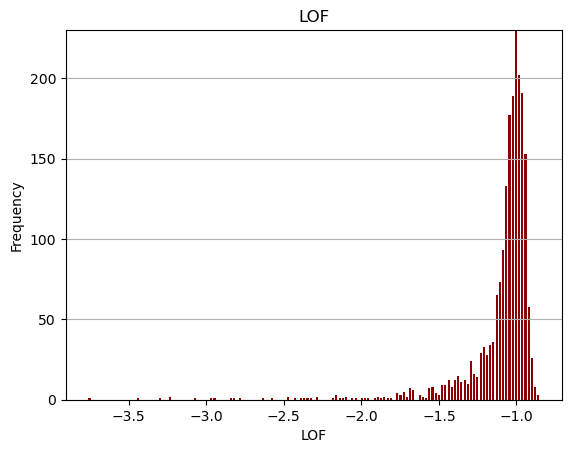

In [204]:
def plot_hist(X: pd.DataFrame, title: str) -> None:
    """ Funcion que genera un grafico de los valores de LOF del dataset """
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.65, color='darkred')
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    
plot_hist(scores, 'LOF')

In [205]:
# Dado el grafico anterior, diremos que un umbral de corte sera aproximadamente -1.85
def lof_threshold(v: float, scores: np.ndarray) -> float:
    ''' Retorna la contaminacion del medio '''
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold 

lof_threshold(-2.5, scores) # APROXimadamente -2.5

0.006464445549477871

In [206]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.0027472527472527475)
labels = lof.fit_predict(X.values)
indices = list(np.where(labels==1)[0])
X = X.iloc[indices] # actualizamos la cant. de datos para ambos
Y = Y.iloc[indices]

In [207]:
print(X.shape, Y.shape)

(2005, 9) (2005,)


# Normalizacion


In [208]:
X_scaled = MinMaxScaler().fit_transform(X.values)

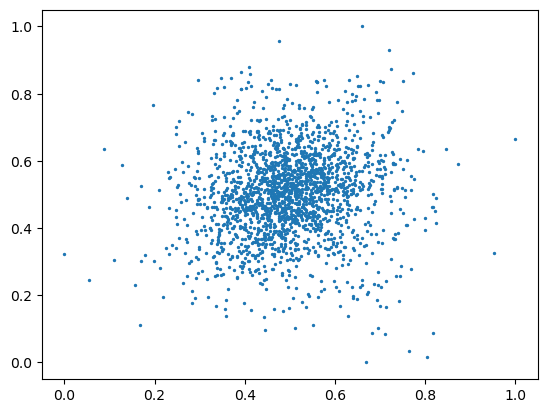

In [209]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=2)
plt.show()

# Logistic Regression 
### Solo para probar como era la clasificacion en otros modelos


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, stratify=Y)

In [211]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.callbacks import EarlyStopping
dense1 = Dense(16, activation='relu') # capa oculta con 10 neuronas y funcion de activacion relu
dense2 = Dense(2, activation='softmax') # funcion softmax para la capa de salida
model = Sequential(layers=[dense1, dense2]) # Definimos el modelo


In [212]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 


In [213]:
callback = EarlyStopping(monitor='loss', patience=2)

In [214]:
model.fit(X_train, y_train, batch_size=32, epochs=18, callbacks=[callback])

Epoch 1/18


44/44 [==============================] - 5s 40ms/step - loss: 0.6837 - accuracy: 0.6001
Epoch 2/18
44/44 [==============================] - 1s 18ms/step - loss: 0.6804 - accuracy: 0.5973
Epoch 3/18
44/44 [==============================] - 1s 14ms/step - loss: 0.6800 - accuracy: 0.5973
Epoch 4/18
44/44 [==============================] - 1s 12ms/step - loss: 0.6795 - accuracy: 0.5966
Epoch 5/18
44/44 [==============================] - 0s 11ms/step - loss: 0.6792 - accuracy: 0.5973
Epoch 6/18
44/44 [==============================] - 1s 11ms/step - loss: 0.6793 - accuracy: 0.5973
Epoch 7/18
44/44 [==============================] - 1s 14ms/step - loss: 0.6782 - accuracy: 0.5973
Epoch 8/18
44/44 [==============================] - 1s 13ms/step - loss: 0.6785 - accuracy: 0.5973
Epoch 9/18
44/44 [==============================] - 1s 15ms/step - loss: 0.6778 - accuracy: 0.5973
Epoch 10/18
44/44 [==============================] - 1s 13ms/step - loss: 0.6772 - accuracy: 0.5973
Epoch 11/18
44/44 [=

In [215]:
labels_classes = ['potable', 'non potable']
y_preds = model.predict(X_test).argmax(axis=-1) # Obtenemos las predicciones del modelo
print("Test Accuracy : {}".format(accuracy_score(y_test, y_preds))) 
print("\nClassification Report : ")
print(classification_report(y_test, y_preds, target_names=labels_classes))

19/19 [==============================] - 0s 11ms/step
Test Accuracy : 0.5980066445182725

Classification Report : 
              precision    recall  f1-score   support

     potable       0.60      1.00      0.75       359
 non potable       1.00      0.00      0.01       243

    accuracy                           0.60       602
   macro avg       0.80      0.50      0.38       602
weighted avg       0.76      0.60      0.45       602



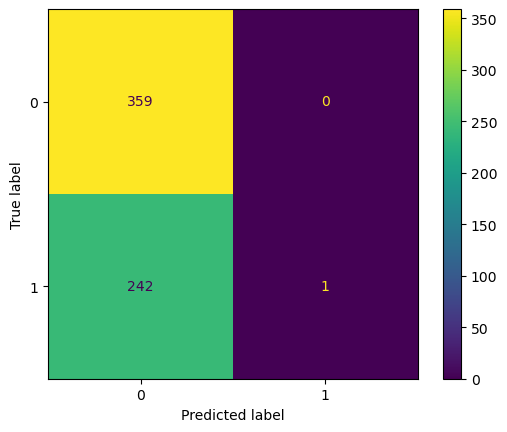

In [216]:
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Observaciones
* Si rellenamos los datos nulos con el promedio de los datos, da un % de prediccion mas alto: 0.61.
* En el caso que eliminemos datos nulos, da un % mas bajo: 0.59
* En general, este modelo presenta gran parte de los datos 
* **La mejor opcion es rellenando los datos segun el promedio**, ya que si eliminamos los nulos, queda totalmente desbalanceado xd